# TP3 - Machine Learning
El objetivo de este trabajo es desarrollar y evaluar modelos basados en redes neuronales,incorporando técnicas de ablación para entender el impacto de diversas modificaciones en el proceso de entrenamiento y en la capacidad de generalización del modelo. No se permite usar librerías de machine learning como scikit-learn o PyTorch, a menos que sea pedido explícitamente en el enunciado del ejercicio.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import importlib

In [6]:
import sys
import os
np.random.seed(122404)
# sys.path.append('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/src')
sys.path.append(os.path.abspath('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP3/src'))

In [7]:
import models as md
importlib.reload(md)
import data_splitting as ds
importlib.reload(ds)
import metricas as mt
importlib.reload(mt)
import auxiliares as aux
importlib.reload(aux)

<module 'auxiliares' from 'c:\\Users\\felic\\OneDrive\\Documentos\\GitHub\\MLyDL_TPs\\Marolda_Felicitas_TP3\\src\\auxiliares.py'>

In [8]:
# Cargar los archivos .npy
X_COMP = np.load(r'c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP3/data/X_COMP.npy')
X_images = np.load(r'c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP3/data/X_images.npy')
y_images = np.load(r'c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP3/data/y_images.npy')

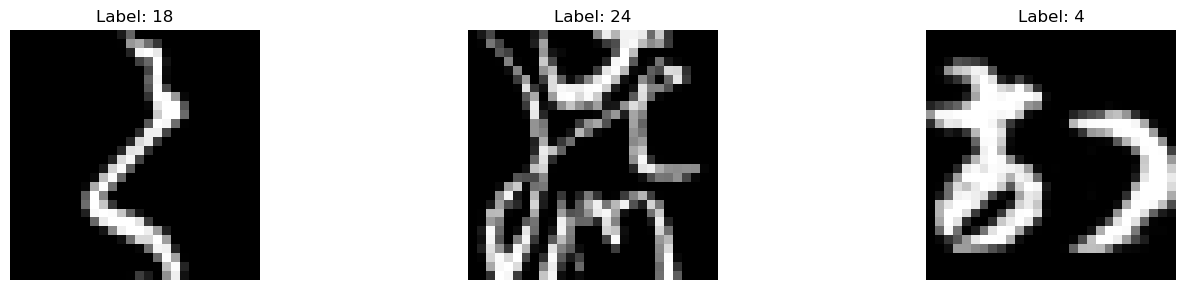

In [9]:
# Choose random pictures from X_images
num_images_to_display = 3
random_indices = np.random.choice(len(X_images), num_images_to_display, replace=False)

plt.figure(figsize=(15, 3))

for i, idx in enumerate(random_indices):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(X_images[idx].reshape(28, 28), cmap='gray')  # Assuming images are 28x28
    plt.title(f"Label: {y_images[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


Dividir el conjunto de datos en tres subconjuntos: Train, Validation y Test

In [10]:
importlib.reload(ds)
# Split the data into train and temp (temporary set for further splitting)
X_normalized = ds.normalize(X_images)
X_train, X_val, X_test, y_train, y_val, y_test = ds.split_data(X_normalized, y_images)

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (3000, 784)
X_val shape: (1000, 784)
X_test shape: (1000, 784)


### 2) Implementación y Entrenamiento de una Red Neuronal Básica
- Implementar una red neuronal con L capas ocultas cada con M(l) nodos con función de activación ReLU (en las capas ocultas) y activación softmax para la capa de salida.
- Implementar un algoritmo para entrenar dicha red, mediante backpropagation y gradiente descendiente estándar, utilizando como función de costo la cross-entropy.

NOTA: El algoritmo backpropagation debe sera adaptado para el caso de clasificación multi-clase con función de activación softmax para la capa de salida y función de costo cross-entropy.

- Entrenar una red neuronal con 2 capas ocultas, con 100 y 80 nodos respectivamente, y graficar la evolución de la función de costo (cross-entropy) sobre los conjuntos de entrenamiento y validación a lo largo de las épocas. Llamaremos a este modelo M0

Epoch 0, Loss: 4.011714871685142
loss val: 1.3366634623886713
Epoch 10, Loss: 3.7937602782856454
loss val: 1.276053419104105
Epoch 20, Loss: 3.65606514605996
loss val: 1.2408005499927657
Epoch 30, Loss: 3.5026947126203054
loss val: 1.2001908604674083
Epoch 40, Loss: 3.321470454228951
loss val: 1.1500316265811508
Epoch 50, Loss: 3.1095221122135603
loss val: 1.0895999709273638
Epoch 60, Loss: 2.877384035765197
loss val: 1.0225882261209878
Epoch 70, Loss: 2.6476737046346015
loss val: 0.9552127666528871
Epoch 80, Loss: 2.441694184055507
loss val: 0.8957845528884552
Epoch 90, Loss: 2.2641578868503722
loss val: 0.8463680406933611
Epoch 100, Loss: 2.112114106092578
loss val: 0.805369444905057
Epoch 110, Loss: 1.982267100258831
loss val: 0.7715093360589332
Epoch 120, Loss: 1.870883846463221
loss val: 0.7435527594693645
Epoch 130, Loss: 1.7742170147032135
loss val: 0.7202021219075473
Epoch 140, Loss: 1.6893846871168519
loss val: 0.7002441552330468
Epoch 150, Loss: 1.6138036537550604
loss val: 0

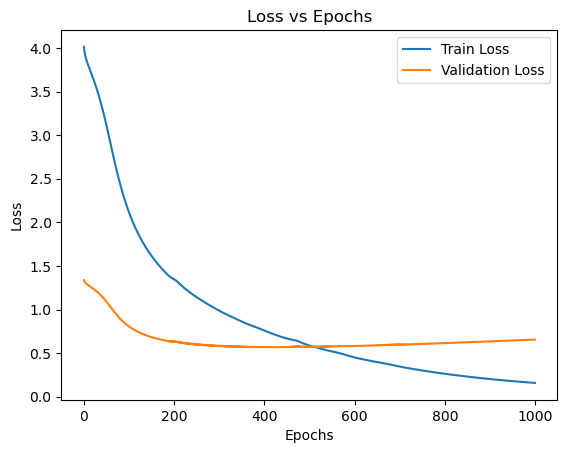

In [11]:
importlib.reload(md)

m0 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "ReLU", "softmax"], [100,80])


Reportar las siguientes métricas de performance, sobre los conjuntos de entrenamiento
y validación, para el modelo base entrenado:
- Accuracy
- Cross-Entropy
- Matriz de Confusión

Accuracy: 0.5870
Cross Entropy: 1.9668


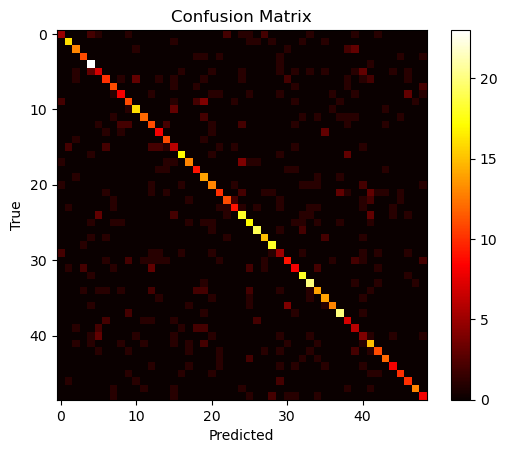

In [12]:
importlib.reload(mt)
y_pred_val = m0.forward_pass(X_val, False)
get_metrics = mt.get_metrics(y_pred_val, y_val)

### 3) Implementación y Entrenamiento de una Red Neuronal Avanzada

Implementar las siguientes mejoras al algoritmo de entrenamiento, y para cada una reportar el efecto observado sobre el tiempo de entrenamiento y la performance del modelo resultante.
- Rate scheduling lineal (con saturación) y exponencial.
- Mini-batch stochastic gradient descent.
- Optimizador ADAM.
- Regularización L2.
- Regularización mediante early stopping.
- OPCIONAL: Regularización mediante dropout.
- OPCIONAL: batch normalization.


In [13]:
funciones_de_activacion = ["ReLU", "ReLU", "softmax"]
nodos_por_capa = [100, 80]

Epoch 0, Loss: 3.9755400046716374
loss val: 1.3323479273524452
Epoch 10, Loss: 3.729194361858526
loss val: 1.2608416679359256
Epoch 20, Loss: 3.5482241024066594
loss val: 1.2105508975783468
Epoch 30, Loss: 3.3435493429284526
loss val: 1.1540564409475587
Epoch 40, Loss: 3.11630124382381
loss val: 1.0893914732371917
Epoch 50, Loss: 2.8834310863661807
loss val: 1.0207974697236784
Epoch 60, Loss: 2.663891328647746
loss val: 0.9558051508066092
Epoch 70, Loss: 2.470803444505647
loss val: 0.899724155227048
Epoch 80, Loss: 2.304983183125121
loss val: 0.8533613235195722
Epoch 90, Loss: 2.164054560527029
loss val: 0.8155654135100552
Epoch 100, Loss: 2.0441917986066294
loss val: 0.7848194849266538
Epoch 110, Loss: 1.9410425762306835
loss val: 0.7592392187927164
Epoch 120, Loss: 1.851081755610132
loss val: 0.7377736037103187
Epoch 130, Loss: 1.7716737907078657
loss val: 0.7196539245680674
Epoch 140, Loss: 1.7011119557781706
loss val: 0.7043337561712759
Epoch 150, Loss: 1.6377464497096594
loss val:

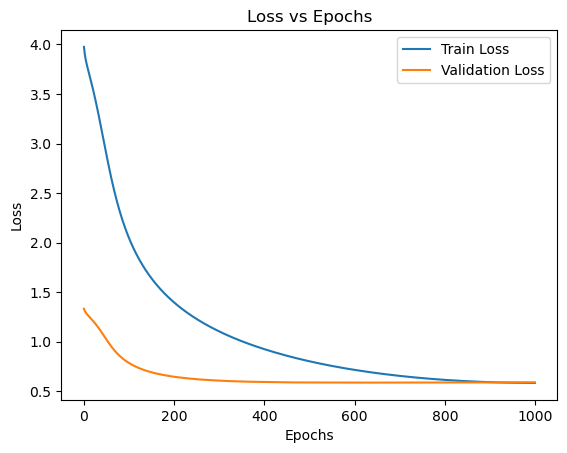

Accuracy: 0.5770
Cross Entropy: 1.7705


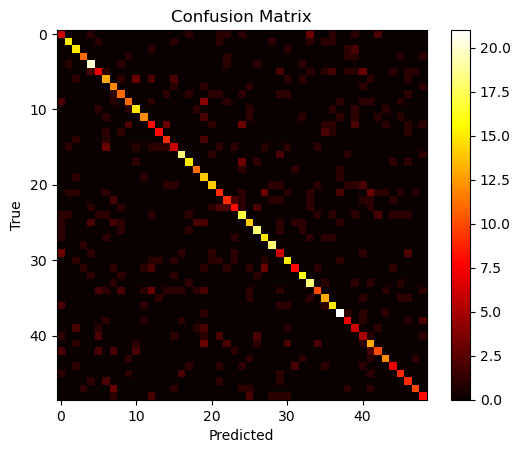

In [14]:
importlib.reload(md)
mejora = {}
mejora["Rate scheduling lineal"] = 0.001
rsl = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)
get_metrics = mt.get_metrics(rsl.forward_pass(X_val, False), y_val)


Epoch 0, Loss: 3.9966580761181083
loss val: 1.3383844939020548
Epoch 10, Loss: 3.789625322788893
loss val: 1.277574922047057
Epoch 20, Loss: 3.6663395618895787
loss val: 1.2446401434956325
Epoch 30, Loss: 3.538420752450321
loss val: 1.2096434598040349
Epoch 40, Loss: 3.4032239572621705
loss val: 1.1729342054478105
Epoch 50, Loss: 3.2671625009722467
loss val: 1.1358565393393405
Epoch 60, Loss: 3.135129859571017
loss val: 1.099368808898901
Epoch 70, Loss: 3.0110519465759227
loss val: 1.064879999357281
Epoch 80, Loss: 2.8970755127915937
loss val: 1.033072426146323
Epoch 90, Loss: 2.795031116947264
loss val: 1.0044520663536058
Epoch 100, Loss: 2.7044685990471518
loss val: 0.9788917860146114
Epoch 110, Loss: 2.6256917049279695
loss val: 0.9564323062221156
Epoch 120, Loss: 2.5571439970217353
loss val: 0.9368898159077566
Epoch 130, Loss: 2.4975008968737216
loss val: 0.9198947874843653
Epoch 140, Loss: 2.445807858874897
loss val: 0.9052164688038238
Epoch 150, Loss: 2.4010712326139876
loss val:

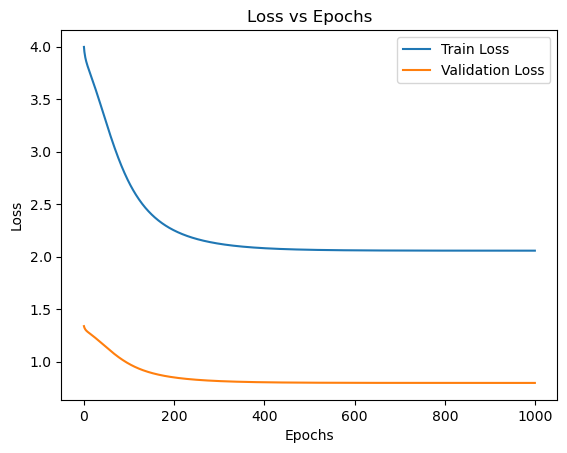

Accuracy: 0.3950
Cross Entropy: 2.3929


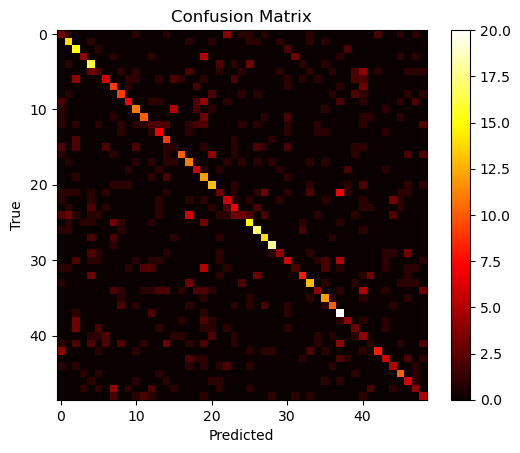

In [66]:
# Learning rate scheduling exponencial
importlib.reload(md)
mejora = {}
mejora["Rate scheduling exponencial"] = 0.99    # decay rate
rsl = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)
get_metrics = mt.get_metrics(rsl.forward_pass(X_val, False), y_val)

Epoch 0, Loss: 3.304940408839356
loss val: 1.1411897219240685
Epoch 10, Loss: 0.7334691187330172
loss val: 0.5694587267230669
Epoch 20, Loss: 0.2289363128640593
loss val: 0.6125348332442242
Epoch 30, Loss: 0.07862602362675751
loss val: 0.6849610376940328
Epoch 40, Loss: 0.033847595678343716
loss val: 0.7292280195603429
Epoch 50, Loss: 0.02018963907752457
loss val: 0.7558844827874444
Epoch 60, Loss: 0.014441578115182591
loss val: 0.7856027225947771
Epoch 70, Loss: 0.010705326842354777
loss val: 0.8069348120156513
Epoch 80, Loss: 0.008432199140547903
loss val: 0.8263435848586819
Epoch 90, Loss: 0.006951234478815819
loss val: 0.8410773688068665
Epoch 100, Loss: 0.005893336732136495
loss val: 0.8536567250342177
Epoch 110, Loss: 0.005098819007553656
loss val: 0.8652000087511253
Epoch 120, Loss: 0.004472851480285747
loss val: 0.8764069109860608
Epoch 130, Loss: 0.003981006655645863
loss val: 0.8843127104446317
Epoch 140, Loss: 0.0035790675931814627
loss val: 0.8937043247911964
Epoch 150, Los

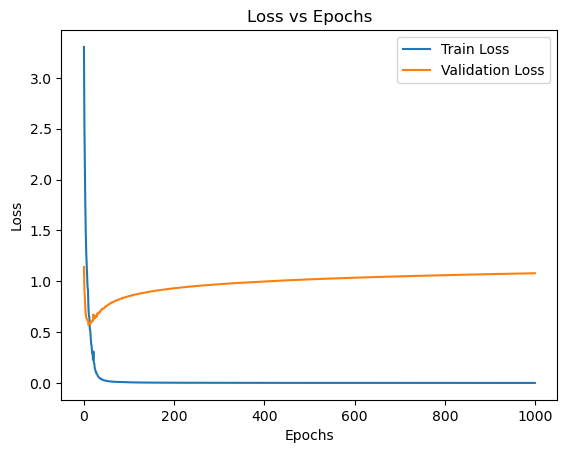

Accuracy: 0.6080
Cross Entropy: 3.4312


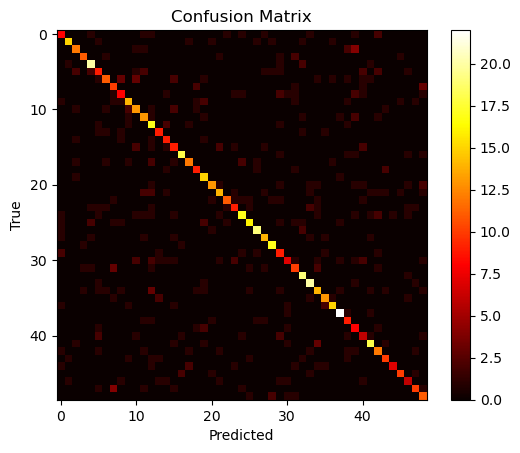

In [15]:
importlib.reload(md)
mejora = {}
mejora["Mini batch stochastic gradient descent"] = 64
minibatch_sgd = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)
get_metrics = mt.get_metrics(minibatch_sgd.forward_pass(X_val, False), y_val)

Epoch 0, Loss: 2.86100390110571
loss val: 1.0085711598307123
Epoch 10, Loss: 0.4479821589298579
loss val: 0.5480289336743372
Epoch 20, Loss: 0.10563467675768777
loss val: 0.6308705192108277
Epoch 30, Loss: 0.030940991989523277
loss val: 0.7085175658376048
Epoch 40, Loss: 0.013154823798896318
loss val: 0.7656436959589572
Epoch 50, Loss: 0.007158781035672302
loss val: 0.8108347258420545
Epoch 60, Loss: 0.004216683509878384
loss val: 0.847506190398813
Epoch 70, Loss: 0.0027022129860626827
loss val: 0.8774914236529463
Epoch 80, Loss: 0.001821839446813358
loss val: 0.9054131333766869
Epoch 90, Loss: 0.0012618938694467594
loss val: 0.9300002454536916
Epoch 100, Loss: 0.000890413301998484
loss val: 0.9536489619296448
Epoch 110, Loss: 0.0006460205388812681
loss val: 0.9761980613203147
Epoch 120, Loss: 0.00047250574599548713
loss val: 0.9950581073287951
Epoch 130, Loss: 0.00034837533366820163
loss val: 1.0156114940966738
Epoch 140, Loss: 0.00026028031293337403
loss val: 1.0370649999991473
Epoch

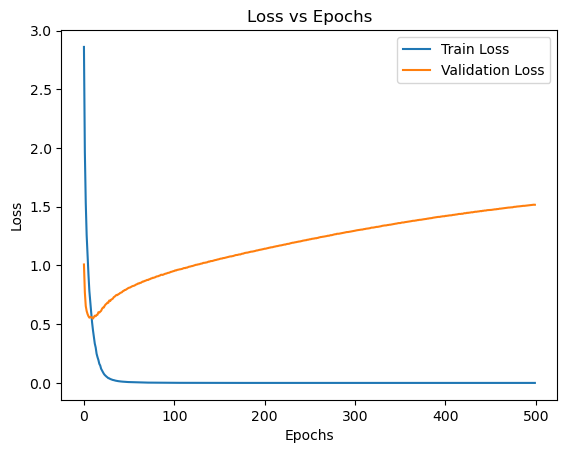

Accuracy: 0.6000
Cross Entropy: 5.6834


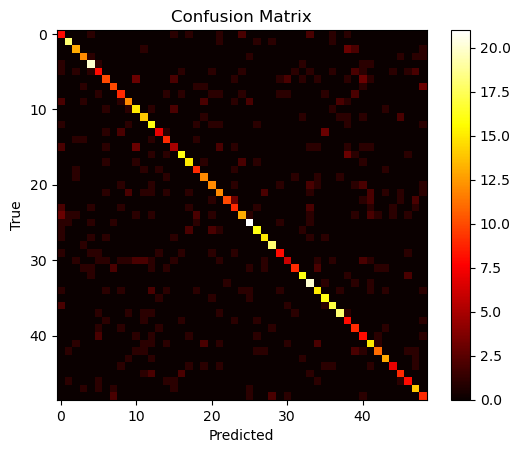

In [59]:
# ADAM
importlib.reload(md)
mejora = {}
mejora["ADAM"] = [0.9, 0.999, 1e-8]
mejora["Mini batch stochastic gradient descent"] = 64
adam = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora, 0.001, 500)
get_metrics = mt.get_metrics(adam.forward_pass(X_val, False), y_val)

Epoch 0, Loss: 3.9754684121099464
loss val: 1.3333232177956837
Epoch 10, Loss: 3.785498705245604
loss val: 1.2785722957709267
Epoch 20, Loss: 3.6343651055653843
loss val: 1.2393705998566844
Epoch 30, Loss: 3.458532788858477
loss val: 1.1940768955010546
Epoch 40, Loss: 3.2555192286485646
loss val: 1.141215693261062
Epoch 50, Loss: 3.027273351466236
loss val: 1.079604214230425
Epoch 60, Loss: 2.7902559128432833
loss val: 1.0129525887520778
Epoch 70, Loss: 2.568631159910042
loss val: 0.9503387972259
Epoch 80, Loss: 2.3748779022698665
loss val: 0.8960784250793133
Epoch 90, Loss: 2.20910562361856
loss val: 0.8498661707332578
Epoch 100, Loss: 2.0681359760873472
loss val: 0.8113348201725862
Epoch 110, Loss: 1.9472155064830923
loss val: 0.7791082946189485
Epoch 120, Loss: 1.8428583731902597
loss val: 0.7521353069859948
Epoch 130, Loss: 1.7514482833541711
loss val: 0.7296021564652131
Epoch 140, Loss: 1.6706253669040674
loss val: 0.7107169925264549
Epoch 150, Loss: 1.5982709263266708
loss val: 0

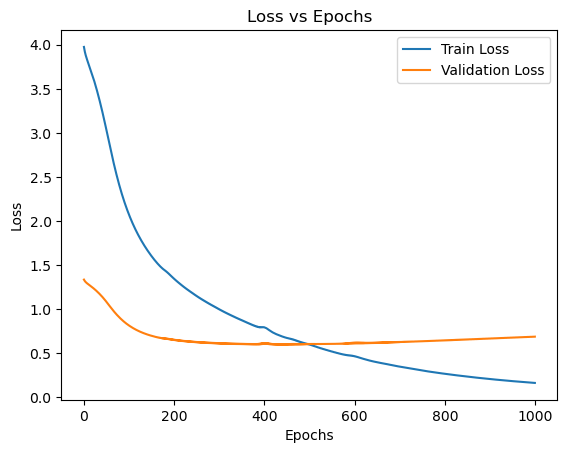

Accuracy: 0.5430
Cross Entropy: 2.0537


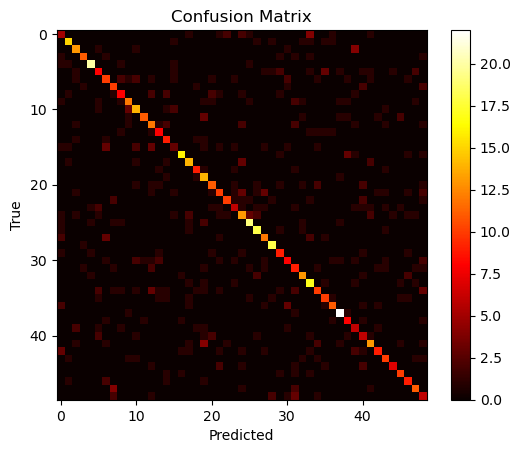

In [17]:
# regularización L2
importlib.reload(md)
mejora = {}
mejora["L2"] = 0.01
l2 = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)
get_metrics = mt.get_metrics(l2.forward_pass(X_val, False), y_val)

Epoch 0, Loss: 3.9595949521335143
loss val: 1.3228691689403602
Epoch 10, Loss: 3.787322276727412
loss val: 1.2727315039486913
Epoch 20, Loss: 3.6617408587505875
loss val: 1.2392334172579986
Epoch 30, Loss: 3.514307206053354
loss val: 1.2001775450306693
Epoch 40, Loss: 3.3359519041042374
loss val: 1.151940847354852
Epoch 50, Loss: 3.1224120233040287
loss val: 1.0941930680957725
Epoch 60, Loss: 2.891593017827597
loss val: 1.0302507971410795
Epoch 70, Loss: 2.665355237869148
loss val: 0.9663808756520105
Epoch 80, Loss: 2.462387088709389
loss val: 0.9094457046111402
Epoch 90, Loss: 2.287844574934666
loss val: 0.8609346201568953
Epoch 100, Loss: 2.1391915284852385
loss val: 0.8203988536440049
Epoch 110, Loss: 2.0124885533940193
loss val: 0.7864570983795981
Epoch 120, Loss: 1.9036417854921164
loss val: 0.7582970951206464
Epoch 130, Loss: 1.8081137335439983
loss val: 0.7346841382853599
Epoch 140, Loss: 1.724047431900515
loss val: 0.7146710060409774
Epoch 150, Loss: 1.6488107012160444
loss val

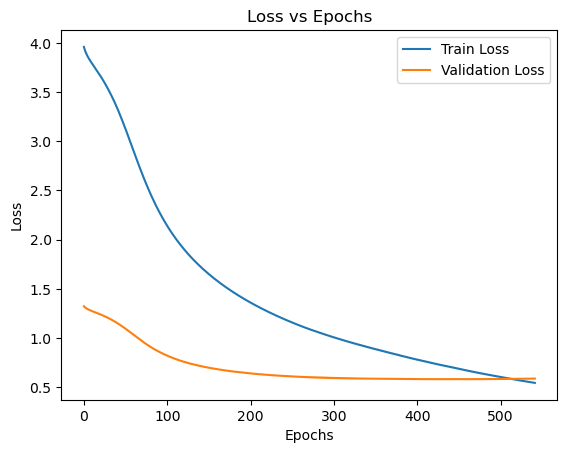

Accuracy: 0.5640
Cross Entropy: 1.7634


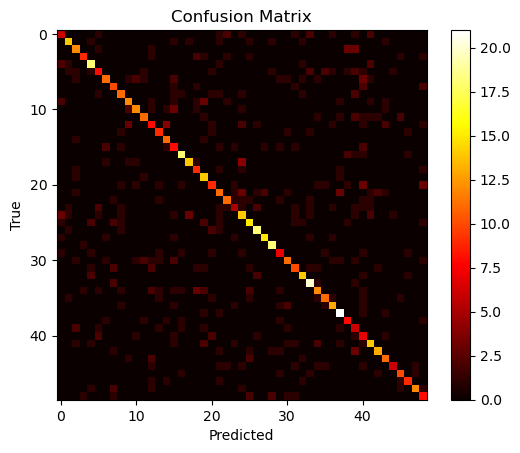

In [29]:
# Early stopping
importlib.reload(md)
mejora = {}
mejora["Early stopping"] = 5
early_stopping = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)

get_metrics = mt.get_metrics(early_stopping.forward_pass(X_val, False), y_val)

Epoch 0, Loss: 3.9324548958244607
loss val: 1.309392567619116
Epoch 10, Loss: 3.8361403913351344
loss val: 1.2816274106721093
Epoch 20, Loss: 3.807086052902055
loss val: 1.2748175561619493
Epoch 30, Loss: 3.777178208614731
loss val: 1.2672458002777887
Epoch 40, Loss: 3.745092299648956
loss val: 1.2581791699313205
Epoch 50, Loss: 3.7083849701212936
loss val: 1.2482994121127113
Epoch 60, Loss: 3.6661297244515887
loss val: 1.2364457125938728
Epoch 70, Loss: 3.6217549403096134
loss val: 1.223955951684443
Epoch 80, Loss: 3.573814607257028
loss val: 1.2105844810379265
Epoch 90, Loss: 3.5230587486879377
loss val: 1.1970311291504434
Epoch 100, Loss: 3.4689502957856675
loss val: 1.1824194126142413
Epoch 110, Loss: 3.4156350479160706
loss val: 1.1685329699704086
Epoch 120, Loss: 3.360357251011906
loss val: 1.153528005374929
Epoch 130, Loss: 3.3050272730669343
loss val: 1.1388478854372788
Epoch 140, Loss: 3.246678915852251
loss val: 1.1227103445597082
Epoch 150, Loss: 3.1906673051820813
loss val:

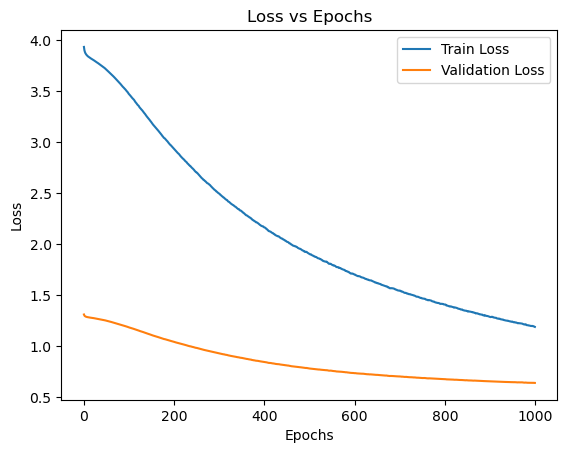

Accuracy: 0.5240
Cross Entropy: 1.9151


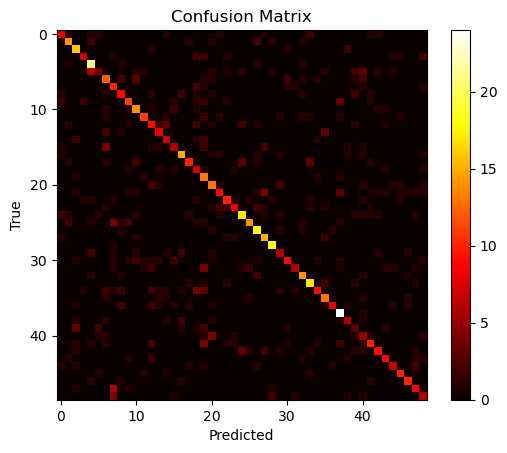

In [19]:
# dropout
importlib.reload(md)
mejora = {}
mejora["Dropout"] = 0.5
dropout = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)
get_metrics = mt.get_metrics(dropout.forward_pass(X_val, False), y_val)

In [20]:
# # batch normalization
# importlib.reload(md)
# mejoras = {}
# mejoras[] = 0.9
# batch_norm = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejoras)
# get_metrics = m"Batch normalization"t.get_metrics(batch_norm.forward_pass(X_val, False), y_val)

Explorar cambios en la arquitectura de la red (es decir, la cantidad de capas ocultas y unidades ocultas por capa), y los hiperparámetros (cada uno de los items en la lista anterior tiene una serie de parámetros que podemos variar), y determinar la configuración que funcione mejor (menor error de validación). Llamaremos a este modelo M1

In [21]:
# vemos la mejor arquitectura
layer_configs = [
    [64],                # 1 capa
    [64, 32],            # 2 capas, más chica
    [80, 100],           # la que ya usás
    [128, 64],           # más profunda que la tuya
    [128, 64, 32],       # 3 capas, decreciente
    [100, 100, 100, 100, 100, 100],  # 5 capas, todas iguales
    [200, 250, 300],  # 3 capas, todas más grandes
]


In [24]:
mejoras = {}
mejoras["Early stopping"] = 5

Probamos siempre con early stopping para acortar el tiempo de entrenamiento evitando, además, el overfitting.

-------------------- 1 capa de 64 nodos --------------------
Epoch 0, Loss: 3.9692738567164696
loss val: 1.3244185095286976
Epoch 10, Loss: 3.7385422181130803
loss val: 1.256149031612789
Epoch 20, Loss: 3.5800379948014536
loss val: 1.2111251287228844
Epoch 30, Loss: 3.412491062460309
loss val: 1.166087551086946
Epoch 40, Loss: 3.2434984460063174
loss val: 1.1204100711167766
Epoch 50, Loss: 3.0757521874261755
loss val: 1.0745423069587259
Epoch 60, Loss: 2.9157114183366692
loss val: 1.0306742129020887
Epoch 70, Loss: 2.767679264981493
loss val: 0.989427683146628
Epoch 80, Loss: 2.63152284361142
loss val: 0.9510573516227531
Epoch 90, Loss: 2.506450944485996
loss val: 0.9158905290590786
Epoch 100, Loss: 2.3938367353956296
loss val: 0.8843336289988287
Epoch 110, Loss: 2.2926162288903797
loss val: 0.8564031114018126
Epoch 120, Loss: 2.2020557423850535
loss val: 0.8317150443709571
Epoch 130, Loss: 2.1208571127337454
loss val: 0.8099176017140617
Epoch 140, Loss: 2.0476201336716184
loss val: 0.

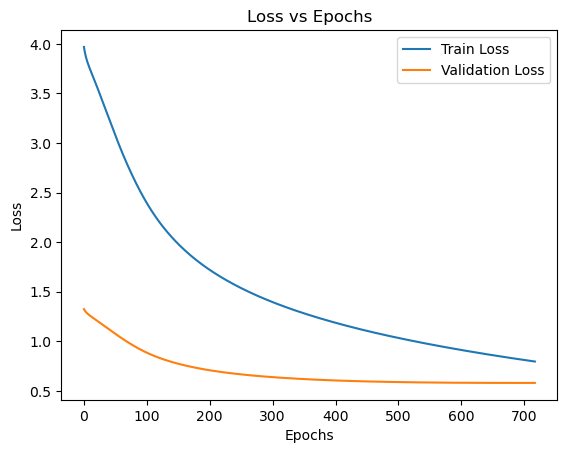

Accuracy: 0.5510
Cross Entropy: 1.7390


In [ ]:
# una capa de 64 nodos
importlib.reload(md)
importlib.reload(mt)
m0 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "softmax"], [64], mejoras)
print("-"*20, "1 capa de 64 nodos", "-"*20)
mt.print_acc_ce(m0.forward_pass(X_val, False), y_val,)

Ya tenemos un modelo básico, ahora vamos a ver que pasa si le agregamos una capa.

Epoch 0, Loss: 3.982066554225975
loss val: 1.3275419938332849
Epoch 10, Loss: 3.836845973649979
loss val: 1.2868502155850665
Epoch 20, Loss: 3.754744918403913
loss val: 1.2663573800902161
Epoch 30, Loss: 3.6686767357574506
loss val: 1.2451510727672268
Epoch 40, Loss: 3.5728045448902885
loss val: 1.221714359470992
Epoch 50, Loss: 3.4674671363575067
loss val: 1.1951457736434723
Epoch 60, Loss: 3.3522292911200755
loss val: 1.1645107939448056
Epoch 70, Loss: 3.227896164747073
loss val: 1.1305670705712771
Epoch 80, Loss: 3.0964595734101032
loss val: 1.0945010841687175
Epoch 90, Loss: 2.9584604049717504
loss val: 1.0568484133171197
Epoch 100, Loss: 2.8181828165466407
loss val: 1.0186517142590825
Epoch 110, Loss: 2.680356249516091
loss val: 0.9812899139305251
Epoch 120, Loss: 2.549310625902098
loss val: 0.945948248300783
Epoch 130, Loss: 2.4288776011046616
loss val: 0.9136275874237149
Epoch 140, Loss: 2.318245408066242
loss val: 0.8847032547133169
Epoch 150, Loss: 2.217410221572619
loss val: 

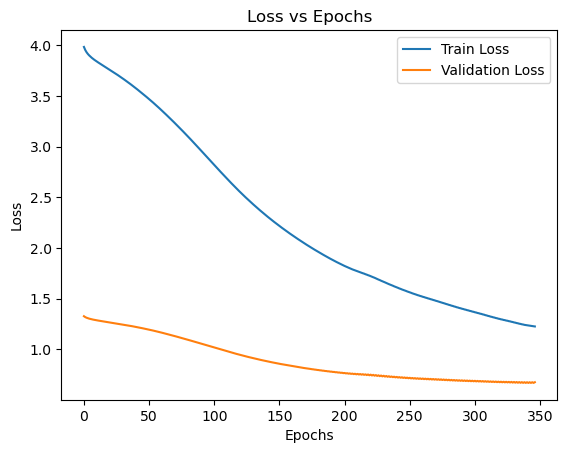

-------------------- 2 capas de 64 y 32 nodos --------------------
Accuracy: 0.5100
Cross Entropy: 2.0311


In [38]:
# 2 capas de 64 y 32 nodos
importlib.reload(md)
importlib.reload(mt)
m1 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "ReLU", "softmax"], [64, 32], mejoras)
print("-"*20, "2 capas de 64 y 32 nodos", "-"*20)
mt.print_acc_ce(m1.forward_pass(X_val, False), y_val,)

Vimos que no mejoró. Probamos mantener la cantidad de capas y aumentar la cantidad de neuronas por capa.

Epoch 0, Loss: 4.01685908054023
loss val: 1.339336966560482
Epoch 10, Loss: 3.7673275814072675
loss val: 1.2676643585372913
Epoch 20, Loss: 3.582943891512199
loss val: 1.2169027604103515
Epoch 30, Loss: 3.3709620180630155
loss val: 1.158287562865569
Epoch 40, Loss: 3.1339855275596618
loss val: 1.092747558860037
Epoch 50, Loss: 2.8922928092538442
loss val: 1.0260410811726137
Epoch 60, Loss: 2.665024169448467
loss val: 0.9619254160415402
Epoch 70, Loss: 2.4610905993844896
loss val: 0.9039152918824267
Epoch 80, Loss: 2.284901304473763
loss val: 0.8543432596593129
Epoch 90, Loss: 2.1343089302093814
loss val: 0.8128952913696509
Epoch 100, Loss: 2.0044056980938083
loss val: 0.7788226269155138
Epoch 110, Loss: 1.8924010846140602
loss val: 0.7505240708939189
Epoch 120, Loss: 1.7949863305156013
loss val: 0.7270129780815308
Epoch 130, Loss: 1.7100382552942566
loss val: 0.7074334676444402
Epoch 140, Loss: 1.635018723059467
loss val: 0.6909979341227863
Epoch 150, Loss: 1.5679467563279477
loss val:

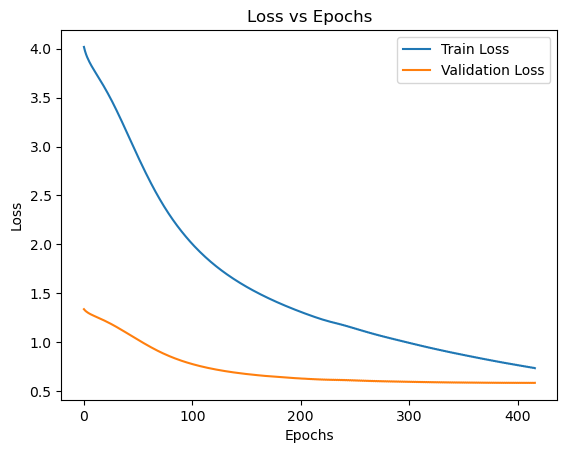

-------------------- 2 capas de 80 y 100 nodos --------------------
Accuracy: 0.5550
Cross Entropy: 1.7623


In [39]:
# [80, 100]
importlib.reload(md)
importlib.reload(mt)
m2 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "ReLU", "softmax"], [80, 100], mejoras)
print("-"*20, "2 capas de 80 y 100 nodos", "-"*20)
mt.print_acc_ce(m2.forward_pass(X_val, False), y_val,)

Como una sola capa era mejor que dos con pocas neuronas pero sube cuando son dos con más neuronas, probamos una sola capa con 200 neuronas.

Epoch 0, Loss: 3.9579409588557657
loss val: 1.3247942178794134
Epoch 10, Loss: 3.6696652448315685
loss val: 1.2408344492984813
Epoch 20, Loss: 3.433353665113231
loss val: 1.174843597705693
Epoch 30, Loss: 3.19987333934245
loss val: 1.1088014925947545
Epoch 40, Loss: 2.972808262381225
loss val: 1.0434860305919273
Epoch 50, Loss: 2.761217697392922
loss val: 0.9818801204309135
Epoch 60, Loss: 2.570495639952281
loss val: 0.926414742059288
Epoch 70, Loss: 2.4025921048818586
loss val: 0.8778615285799839
Epoch 80, Loss: 2.2572564290163677
loss val: 0.836351425671856
Epoch 90, Loss: 2.132378329115847
loss val: 0.8014382378301513
Epoch 100, Loss: 2.0251422809416257
loss val: 0.7721419155682697
Epoch 110, Loss: 1.932343794247803
loss val: 0.7474384177295571
Epoch 120, Loss: 1.8514778484020293
loss val: 0.7264908719796382
Epoch 130, Loss: 1.780384844456958
loss val: 0.7087206023501287
Epoch 140, Loss: 1.7172141860631382
loss val: 0.6934108289615271
Epoch 150, Loss: 1.6605687626502283
loss val: 0.

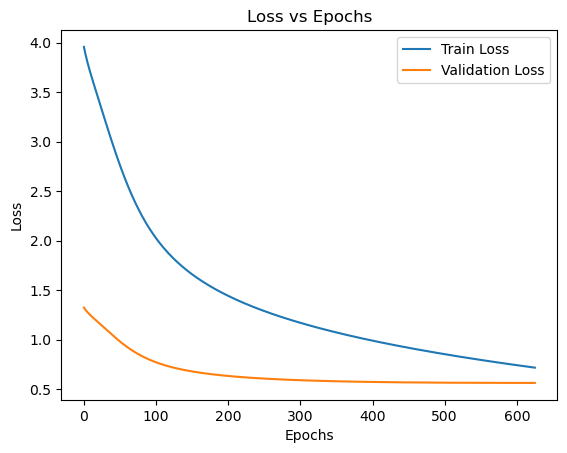

-------------------- 1 capa de 200 nodos --------------------
Accuracy: 0.5640
Cross Entropy: 1.6923


In [40]:
# una capa 200 neuronas
importlib.reload(md)
importlib.reload(mt)
m3 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "softmax"], [200], mejoras)
print("-"*20, "1 capa de 200 nodos", "-"*20)
mt.print_acc_ce(m3.forward_pass(X_val, False), y_val,)

Nos fue mejor con mas neuronas. Probamos muchas capas ocultas y muchas neuronas. Como oscilaba probamos sin early stopping a ver como continuaba. Probando la idea de "just add more layers".

Epoch 0, Loss: 3.9477534640935557
loss val: 1.3205367013968414
Epoch 10, Loss: 3.6128611492242033
loss val: 1.2275043130591206
Epoch 20, Loss: 3.173491243482379
loss val: 1.100832852468695
Epoch 30, Loss: 2.5918836738861093
loss val: 0.9324082780968665
Epoch 40, Loss: 2.595557471239032
loss val: 0.9514427835538066
Epoch 50, Loss: 2.0259751827853316
loss val: 0.7988323429308806
Epoch 60, Loss: 2.0100009047954344
loss val: 0.7919219300187046
Epoch 70, Loss: 1.7370468529107888
loss val: 0.7298388044728966
Epoch 80, Loss: 1.6704637685702737
loss val: 0.7227708323037
Epoch 90, Loss: 1.518823899562731
loss val: 0.6830672179742396
Epoch 100, Loss: 1.3953866754750461
loss val: 0.6722297753417841
Epoch 110, Loss: 1.2186066447461128
loss val: 0.6245515829014451
Epoch 120, Loss: 1.100472326887887
loss val: 0.6168607155849123
Epoch 130, Loss: 1.04461139662424
loss val: 0.6191773578709603
Epoch 140, Loss: 0.9993673107537503
loss val: 0.60783877988984
Epoch 150, Loss: 0.9133973947308845
loss val: 0.

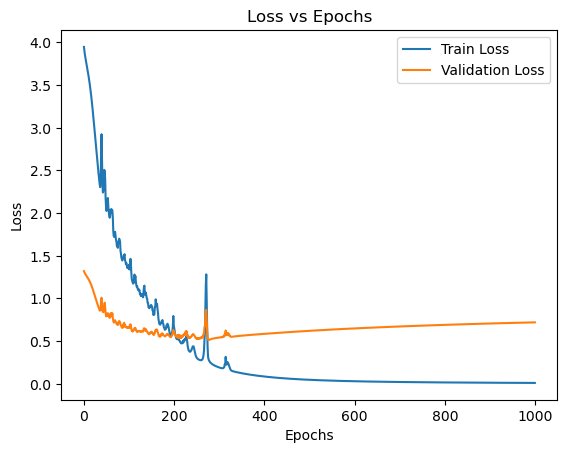

-------------------- 4 capas de [200,250, 300, 500] nodos --------------------
Accuracy: 0.6210
Cross Entropy: 2.1721


In [42]:
# [200, 250, 300, 500]
importlib.reload(md)
importlib.reload(mt)
m3 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "ReLU", "ReLU", "ReLU", "softmax"], [200, 250, 300, 500])
print("-"*20, "4 capas de [200, 250, 300, 500] nodos", "-"*20)
mt.print_acc_ce(m3.forward_pass(X_val, False), y_val,)

Fue mejor que en los otros pero tardó mucho tiempo asi que probamos con 3 capas ocultas, aunque probablemente las oscilaciones se correlacionen con un alto learning rate, como tarda mucho tiempo, por "no free lunch" no se continua evaluando sobre esta cantidad de capas y neuronas.

Epoch 0, Loss: 4.034788912932164
loss val: 1.3323969094470929
Epoch 10, Loss: 3.8602866630146218
loss val: 1.2857284405604694
Epoch 20, Loss: 3.759793510492593
loss val: 1.2593650353657901
Epoch 30, Loss: 3.655060188500515
loss val: 1.2309293660483753
Epoch 40, Loss: 3.530222802357389
loss val: 1.195363721194895
Epoch 50, Loss: 3.3776244267827744
loss val: 1.1514973258617252
Epoch 60, Loss: 3.203146818181315
loss val: 1.1005475832506582
Epoch 70, Loss: 3.0140634140980316
loss val: 1.0446867384710625
Epoch 80, Loss: 2.8213237402337046
loss val: 0.9884619800896508
Epoch 90, Loss: 2.6355909426635358
loss val: 0.9349372721356276
Epoch 100, Loss: 2.463456754923725
loss val: 0.8863617658001391
Epoch 110, Loss: 2.310012319725222
loss val: 0.8432869627603117
Epoch 120, Loss: 2.1734550511828723
loss val: 0.8059395771720123
Epoch 130, Loss: 2.052965559503968
loss val: 0.7744353604961685
Epoch 140, Loss: 1.9464015746374725
loss val: 0.7478505925873236
Epoch 150, Loss: 1.8517481948877406
loss val:

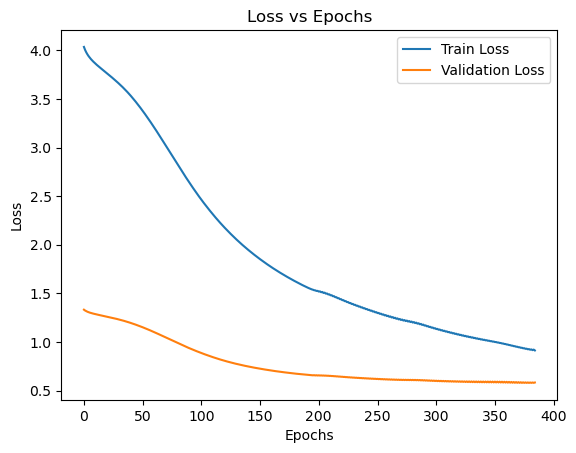

-------------------- 4 capas de [100, 200, 200] nodos --------------------
Accuracy: 0.5530
Cross Entropy: 1.7502


In [43]:
# [100, 200, 200]
importlib.reload(md)
importlib.reload(mt)
m3 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "ReLU", "ReLU", "softmax"], [100, 200, 200], mejoras, 0.05)
print("-"*20, "4 capas de [100, 200, 200] nodos", "-"*20)
mt.print_acc_ce(m3.forward_pass(X_val, False), y_val,)

Se nota un patrón de que al modelo le va bien cuando tiene muchos nodos en la última capa. Probamos.

Epoch 0, Loss: 3.985378982218895
loss val: 1.3297895821458778
Epoch 10, Loss: 3.7493488203972194
loss val: 1.2675635056070431
Epoch 20, Loss: 3.551892225716423
loss val: 1.2161123802498672
Epoch 30, Loss: 3.295168427713456
loss val: 1.1441164302270699
Epoch 40, Loss: 2.9970818409314743
loss val: 1.0573648160987978
Epoch 50, Loss: 2.7001290523867767
loss val: 0.97110740805422
Epoch 60, Loss: 2.4363122747127854
loss val: 0.8949095524822117
Epoch 70, Loss: 2.2189527877914608
loss val: 0.8330356866316834
Epoch 80, Loss: 2.0435260093671435
loss val: 0.7841905565804126
Epoch 90, Loss: 1.9015428321527503
loss val: 0.745826606205424
Epoch 100, Loss: 1.7842719969383476
loss val: 0.7156617978505474
Epoch 110, Loss: 1.685214686183693
loss val: 0.6915213253024786
Epoch 120, Loss: 1.6002738113258383
loss val: 0.6722629347763603
Early stopping count: 4 in epoch 122
Early stopping count: 4 in epoch 124
Early stopping count: 4 in epoch 126
Early stopping count: 4 in epoch 128
Early stopping count: 4 i

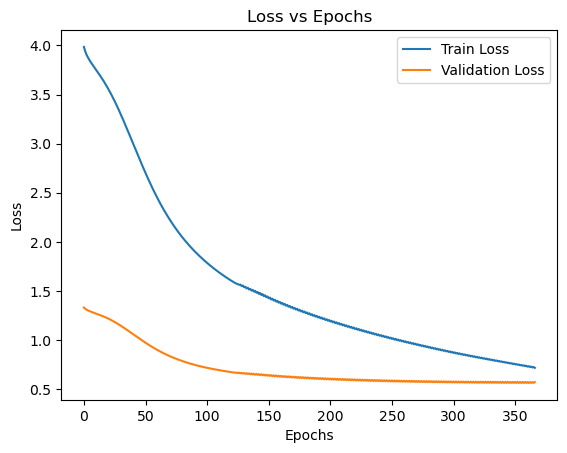

-------------------- 4 capas de [60, 300] nodos --------------------
Accuracy: 0.5730
Cross Entropy: 1.7115


In [44]:
# [60, 300]
importlib.reload(md)
importlib.reload(mt)
m3 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "ReLU", "softmax"], [60, 300], mejoras)
print("-"*20, "4 capas de [60, 300] nodos", "-"*20)
mt.print_acc_ce(m3.forward_pass(X_val, False), y_val,)

Expandimos sobre esta idea

Epoch 0, Loss: 3.9700280169331004
loss val: 1.3213234713581425
Epoch 10, Loss: 3.650519301071476
loss val: 1.2406360711475626
Epoch 20, Loss: 3.273843925440652
loss val: 1.1363222647162665
Epoch 30, Loss: 2.80183359327592
loss val: 1.0011605730500999
Epoch 40, Loss: 2.3934934000501458
loss val: 0.8845464817261027
Epoch 50, Loss: 2.09331356368896
loss val: 0.7995753288380563
Early stopping count: 4 in epoch 59
Epoch 60, Loss: 1.9244622291504174
loss val: 0.7461811406469188
Early stopping count: 4 in epoch 63
Early stopping count: 3 in epoch 64
Early stopping count: 4 in epoch 68
Epoch 70, Loss: 1.7840483934358957
loss val: 0.7245119373660966
Early stopping count: 4 in epoch 72
Early stopping count: 4 in epoch 76
Early stopping count: 4 in epoch 80
Epoch 80, Loss: 1.661971358399687
loss val: 0.6982700299142506
Early stopping count: 4 in epoch 82
Early stopping count: 4 in epoch 84
Early stopping count: 4 in epoch 88
Early stopping count: 4 in epoch 90
Epoch 90, Loss: 1.5539551822998103
l

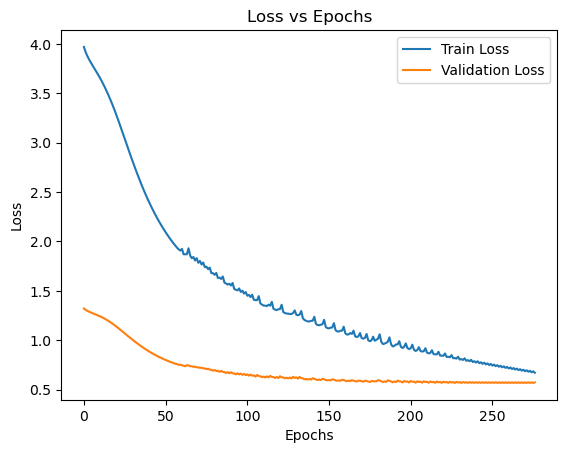

-------------------- 4 capas de [60, 800] nodos --------------------
Accuracy: 0.5730
Cross Entropy: 1.7187


In [45]:
# [60, 800]
importlib.reload(md)
importlib.reload(mt)
m3 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "ReLU", "softmax"], [60, 800], mejoras)
print("-"*20, "4 capas de [60, 800] nodos", "-"*20)
mt.print_acc_ce(m3.forward_pass(X_val, False), y_val,)

Para optimizar tiempo bajamos un poco.

Epoch 0, Loss: 3.973399779823034
loss val: 1.3368346626949619
Epoch 10, Loss: 3.739604428068472
loss val: 1.2678775878216075
Epoch 20, Loss: 3.5018013989054793
loss val: 1.2018208287158363
Epoch 30, Loss: 3.1682474619105543
loss val: 1.1026209644556924
Epoch 40, Loss: 2.8142063121411
loss val: 0.9980808368849794
Epoch 50, Loss: 2.4991132656283024
loss val: 0.9065983441521513
Epoch 60, Loss: 2.2370791918641797
loss val: 0.8317739768286366
Epoch 70, Loss: 2.0271978464840306
loss val: 0.7735577863819253
Epoch 80, Loss: 1.8604926548472058
loss val: 0.7294961291317156
Epoch 90, Loss: 1.7255142755216324
loss val: 0.6961001776577109
Early stopping count: 4 in epoch 96
Early stopping count: 4 in epoch 98
Early stopping count: 4 in epoch 100
Epoch 100, Loss: 1.6264773061734379
loss val: 0.6759806836971586
Early stopping count: 4 in epoch 102
Early stopping count: 4 in epoch 104
Early stopping count: 4 in epoch 106
Early stopping count: 4 in epoch 108
Early stopping count: 4 in epoch 110
Epoch 1

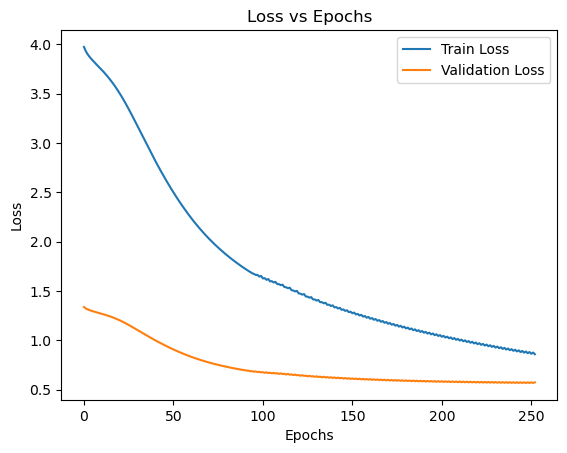

-------------------- 4 capas de [60, 500] nodos --------------------
Accuracy: 0.5640
Cross Entropy: 1.7182


In [46]:
# [60, 500]
importlib.reload(md)
importlib.reload(mt)
m3 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "ReLU", "softmax"], [60, 500], mejoras)
print("-"*20, "4 capas de [60, 500] nodos", "-"*20)
mt.print_acc_ce(m3.forward_pass(X_val, False), y_val,)

Teniendo en cuenta tiempo y performance para el modelo final vamos a usar la red con la arquitectura más compleja que era la de 4 capas con muchos nodos pero, con el fin de optimizar el tiempo, para la elegir los hiperparámetros, vamos a usar una red de una sola capa con 100 nodos para evaluar los hiperparámetros.

In [51]:
importlib.reload(md)
importlib.reload(aux)
learning_rates = [0.001, 0.01, 0.1, 1.0]
params = [["ReLU", "softmax"], [100], None]

losses_cross_val = aux.cross_validation_lr(X_train, y_train, learning_rates, params)
best_lr = learning_rates[losses_cross_val.index(min(losses_cross_val))]
print("La menor pérdida fue: ", min(losses_cross_val), "correspondiente al learning rate: ", best_lr)

Learning Rate: 0.001
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Learning Rate: 0.01
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Learning Rate: 0.1
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Learning Rate: 1.0
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
La menor pérdida fue:  (0.05900000000000001, 3.7998976476009205) correspondiente al learning rate:  0.001


### Mejoras independientes
Probamos los mejores parámetros para cada mejoras asumiendo que se usa esa sola con Early stopping.
##### Learning Rate Scheduling
Lineal

In [61]:
importlib.reload(md)
importlib.reload(aux)

stop_crit = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1]
params = [["ReLU", "softmax"], [100], best_lr]

name = ("Rate scheduling lineal")
losses_rsl = aux.cross_validation_mejora(X_train, y_train, name, stop_crit, params)
best_stop_crit = stop_crit[losses_rsl.index(min(losses_rsl))]
print("La menor pérdida fue: ", min(losses_rsl), "correspondiente al mínimo lr: ", best_stop_crit)

hp: 0
Avg results: 
                      avg acc =  0.04966666666666667       avg ce =  3.8166407037085235
hp: 1e-05
Avg results: 
                      avg acc =  0.03633333333333333       avg ce =  3.865264187945307
hp: 0.0001
Avg results: 
                      avg acc =  0.03833333333333333       avg ce =  3.867647213454158
hp: 0.001
Avg results: 
                      avg acc =  0.052000000000000005       avg ce =  3.807890472016259
hp: 0.01
Avg results: 
                      avg acc =  0.42700000000000005       avg ce =  2.4773297279167936
hp: 0.1
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Avg results: 
                      avg acc =  0.5693333333333334       avg ce =  1.7600131863699133
La menor pérdida fue:  (0.03633333333333333, 3.865264187945307) correspondiente al mínimo lr:  1e-05


Exponencial

In [ ]:
importlib.reload(md)
importlib.reload(aux)

decay_rates = [0.5, 0.9, 0.99, 0.9999, 1]
params = [["ReLU", "softmax"], [100], best_lr]

name = ("Rate scheduling exponencial")
losses_rse = aux.cross_validation_mejora(X_train, y_train, name, decay_rates, params)
best_dr = decay_rates[losses_rse.index(min(losses_rse))]
print("La menor pérdida fue: ", min(losses_rse), "correspondiente al decay rate: ", best_dr)

hp: 0.5


### Mini batch stochastic gradient descent
hiperparámetro: batch size

**batch size**
- muy chico --> va a oscliar más y puede diverger
- muy grande --> el lo mismo que no usar sgd

In [60]:
importlib.reload(md)
importlib.reload(aux)

batch_sizes = [1, 16, 32, 64, 128, 256, 512]
params = [["ReLU", "softmax"], [100], best_lr]
name = "Mini batch stochastic gradient descent"
losses_sgd = aux.cross_validation_mejora(X_train, y_train, name, batch_sizes, params)
best_batch_size = batch_sizes[losses_sgd.index(min(losses_sgd))]
print("La menor pérdida fue: ", min(losses_sgd), "correspondiente al batch size: ", best_batch_size)

hp: 1
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Avg results: 
                      avg acc =  0.5813333333333334       avg ce =  2.985920398403107
hp: 16
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Avg results: 
                      avg acc =  0.565       avg ce =  1.9648976050794178
hp: 32
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Avg results: 
                      avg acc =  0.5713333333333332       avg ce =  1.7910835329202492
hp: 64
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Avg results: 
                      avg acc =  0.5566666666666666       avg ce =  1.8125980257645236
hp: 128
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Avg results: 
                      avg acc =  0.5193333333333333       avg ce =  2.010560573708473
hp: 256
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Avg results: 
                      avg acc =  0.4296666666666667       avg ce =  2.48465938000533
hp: 512
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Avg results: 
                      avg acc =

Interpretación de lo obtenido

### ADAM
hiperparámetros: beta1, beta2, epsilon
**beta1** --> momentum (cuanta memoria tiene mi modelo)
**beta2** --> decay rate (bajo puede generar ruido)
**beta3** --> busca estabilidad numérica

In [ ]:
# ADAM sin minibatches
importlib.reload(md)
importlib.reload(aux)
adam_hp = [[0.9, 0.999, 1e-8], [0.5, 0.8, 1e-8], [0.99, 0.99999, 1e-8]]

params = [["ReLU", "softmax"], [100], best_lr]

losses_adam = aux.cross_validation_mejora(X_train, y_train, "ADAM", adam_hp, params)
best_adam_hp = adam_hp[losses_adam.index(min(losses_adam))]
print("La menor pérdida fue: ", min(losses_adam), "correspondiente a los hiperparámetros: ", best_batch_size)

hp: (0.9, 0.999, 1e-08)
Fold 1/5
Early stopping count: 4 in epoch 94
Early stopping count: 3 in epoch 95
Early stopping count: 2 in epoch 96
Early stopping count: 1 in epoch 97
Early stopping count: 0 in epoch 98
Early stopping triggered
Fold 2/5
Early stopping count: 4 in epoch 100
Early stopping count: 3 in epoch 101
Early stopping count: 2 in epoch 102
Early stopping count: 1 in epoch 103
Early stopping count: 0 in epoch 104
Early stopping triggered
Fold 3/5
Early stopping count: 4 in epoch 89
Early stopping count: 3 in epoch 90
Early stopping count: 2 in epoch 91
Early stopping count: 1 in epoch 92
Early stopping count: 0 in epoch 93
Early stopping triggered
Fold 4/5
Early stopping count: 4 in epoch 91
Early stopping count: 3 in epoch 92
Early stopping count: 2 in epoch 93
Early stopping count: 1 in epoch 94
Early stopping count: 0 in epoch 95
Early stopping triggered
Fold 5/5
Early stopping count: 4 in epoch 85
Early stopping count: 3 in epoch 86
Early stopping count: 2 in epoch 8

### L2
lambda

In [ ]:
importlib.reload(md)
importlib.reload(aux)

lambdas = [0, 0.0001, 0.001, 0.01, 0.1, 1]

params = [["ReLU", "softmax"], [100], best_lr]
name = "L2"

losses_l2 = aux.cross_validation_mejora(X_train, y_train, name, lambdas, params)
best_l2 = lambdas[losses_l2.index(min(losses_l2))]
print("La menor pérdida fue: ", min(losses_l2), "correspondiente al lambda: ", best_l2)

hp: 0
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Avg results: 
                      avg acc =  0.054000000000000006       avg ce =  3.8013837211126487
hp: 0.0001
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Avg results: 
                      avg acc =  0.05566666666666666       avg ce =  3.784508975001524
hp: 0.001
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Avg results: 
                      avg acc =  0.05633333333333333       avg ce =  3.7829474916860137
hp: 0.01
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Avg results: 
                      avg acc =  0.05266666666666666       avg ce =  3.813188717784084
hp: 0.1
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Avg results: 
                      avg acc =  0.053000000000000005       avg ce =  3.8073978074672707
hp: 1
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Avg results: 
                      avg acc =  0.062       avg ce =  3.7951207621007628
La menor pérdida fue:  (0.05266666666666666, 3.813188717784084) correspondiente al

### Dropout
Dropout rate

In [ ]:
importlib.reload(md)
importlib.reload(aux)

dropoutRates = [0, 0.0001, 0.001, 0.01, 0.1, 1]

params = [["ReLU", "softmax"], [100], best_lr]
name = "Dropout"

losses_dropout = aux.cross_validation_mejora(X_train, y_train, name, dropoutRates, params)
best_dr = dropoutRates[losses_dropout.index(min(losses_dropout))]
print("La menor pérdida fue: ", min(losses_dropout), "correspondiente al dropout rate: ", best_dr)

### Combinaciones de mejoras

Ahora que obtuvimos de manera greedy los mejores hiperparámetros para cada mejora, vamos a probar combinaciones de mejoras.

In [ ]:
importlib.reload(md)
importlib.reload(mt)

In [22]:
# grid search
# definimos hiperparametros a probar 
importlib.reload(md)
importlib.reload(ds)
importlib.reload(mt)
importlib.reload(aux)

learning_rates = [0.001, 0.01, 0.1]
adam_betas = [None,(0.9, 0.999, 1e-8), (0.8, 0.999, 1e-8), (0.9, 0.99, 1e-8)]
rsl = [None, 0.001, 0.01]
batch_size = [None, 32, 64]
l2_lambda = [None, 0.0001, 0.001]
early_stopping_patience = [None, 5]
dropout = [None, 0.8, 0.5]
batch_norm = [None, 0.9]

# Arquitecturas posibles (ejemplos)
layer_configs = [
    [64],                # 1 capa
    [64, 32],            # 2 capas, más chica
    [80, 100],           # la que ya usás
    [128, 64],           # más profunda que la tuya
    [128, 64, 32],       # 3 capas, decreciente
    [100, 100, 100, 100, 100, 100],  # 5 capas, todas iguales
    [200, 250, 300],  # 3 capas, todas más grandes
]

m = {}
m = {
    "Rate scheduling lineal": None,
    "Mini batch stochastic gradient descent": None,
    "ADAM": None,
    "L2": None,
    "Early stopping": None,
    "Dropout": None,
    "Batch normalization": None,
    "Grid search": None
}
# mod = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, m)
aux.grid_search(X_train, y_train, X_val, y_val, learning_rates, adam_betas, rsl, batch_size, l2_lambda, early_stopping_patience, dropout, batch_norm, layer_configs)


AttributeError: module 'auxiliares' has no attribute 'grid_search'